In [2]:
! pip3 install requests
! pip3 install bs4
! pip3 install beautifulsoup4
! pip3 install seaborn
! pip3 install streamlit

  Using cached requests-2.30.0-py3-none-any.whl (62 kB)
  Using cached charset_normalizer-3.1.0-cp311-cp311-win_amd64.whl (96 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-2.0.2-py3-none-any.whl (123 kB)
                                              0.0/157.0 kB ? eta -:--:--
     ---------                             41.0/157.0 kB 653.6 kB/s eta 0:00:01
     -------------------------------------  153.6/157.0 kB 1.5 MB/s eta 0:00:01
     -------------------------------------- 157.0/157.0 kB 1.3 MB/s eta 0:00:00
  Using cached bs4-0.0.1-py3-none-any.whl
  Using cached beautifulsoup4-4.12.2-py3-none-any.whl (142 kB)
  Using cached soupsieve-2.4.1-py3-none-any.whl (36 kB)
  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Using cached pandas-2.0.1-cp311-cp311-win_amd64.whl (10.6 MB)
  Using cached matplotlib-3.7.1-cp311-cp311-win_amd64.whl (7.6 MB)
  Using cached contourpy-1.0.7-cp311-cp31

In [6]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
from bs4 import BeautifulSoup
from urllib.parse import urlparse
# Solicitar el nombre por teclado
userName = input("¿Cuál es tu nombre?:")
# Solicitar el identificador por teclado
identificador = input("¿Cuál es el Id del resultado del test?:")

while True:
    # Concatenar el identificador a la URL base del sitio web
    url = f"https://bigfive-test.com/result/{identificador}"

    # Obtener la respuesta HTTP de la URL
    response = requests.get(url)

    # Buscar la frase ""Request failed with status code 500"" en la URL    
    if "Request failed with status code 500" in response.text:
     identificador = input("La URL no es válida. Por favor, verifica el identificador del resultado del test.")
    else:
     # Crear el objeto soup object desde response
     soup = BeautifulSoup(response.content, "html.parser")
     break


# Definiendo la lista de atributos a extraer
atributos = ["Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
              "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
              "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
              "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
              "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
              "Intelecto", "Liberalismo", "Simpatía", "Confianza", "Moral", "Altruismo", 
              "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
              "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"]

# Creando una lista para almacenar los resultados
resultados = [identificador, userName.title()]

# loop over the attributes and extract the corresponding scores
for atributo in atributos:
    # find the corresponding div
    div = soup.find("a", {"href": f"#{atributo.lower()}"})
    # extract the score
    score = div.find_next('p').text.split(":")[1].strip()
    # Validando que el resultado a extraer sean solo dos digitos
    if score[3] == "-":
        score = int(score[:2])
    else:        
        # Validando que el resultado a extraer sean solo un digito
        if score[2] == "-":
            score = int(score[:1])
        # Validando que el resultado a extraer sean tres digitos
        else:
            score = int(score[:3])   
        
    # append the attribute name and score to the results list
    resultados.append(score)    

# create a pandas DataFrame from the results list

testPersonalidad = pd.DataFrame([resultados], columns=["Identificador", "Nombre","Neurosis", "Ansiedad", "Ira", "Depresión", "Vergüenza", 
                                                        "Falta de moderacion", "Vulnerabilidad", "Extroversión", 
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Apertura a experiencias", 
                                                        "Imaginación", "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Simpatía", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Meticulosidad", "Autoeficacia", 
                                                        "Orden", "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ])

# print the DataFrame
#print(testPersonalidad)
"""
#Creando la grafica 
testGrafica = testPersonalidad.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad",                                                          
                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", 
                                                        "Búsqueda de nuevas experiencias", "Alegría", "Imaginación", 
                                                        "Interes artístico", "Sensibilidad", "Ansias de aventura", 
                                                        "Intelecto", "Liberalismo", "Confianza 2", "Moral", "Altruismo", 
                                                        "Cooperación", "Modestia", "Empatía", "Autoeficacia", "Orden", 
                                                        "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"
                                                         ]]
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(testGrafica.iloc[0], marker = 'o')
plt.xticks(rotation=90)
ax.set_title(userName.title(), loc = "left", fontdict = {'fontsize':12, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("Puntuación")
ax.set_ylim(bottom=0, top=25)
ax.set_yticks(range(0, 26, 5))
fig.savefig(userName.title() + " test personalidad todo.png")

datos5 = testPersonalidad.loc[:, ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]]

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(datos5.iloc[0], marker = 'o')
ax.set_title(userName.title(), loc="left", fontdict={"fontsize":12, "fontweight":"bold", "color":"tab:blue"})
ax.set_ylabel("Puntuación")
ax.set_ylim(bottom=0, top=120)
#plt.xticks(rotation=0)
fig.savefig(userName.title() + " test personalidad 5.png")
"""

'\n#Creando la grafica \ntestGrafica = testPersonalidad.loc[:, ["Ansiedad", "Ira", "Depresión", "Vergüenza", "Falta de moderacion", "Vulnerabilidad",                                                          \n                                                        "Cordialidad", "Sociabilidad", "Confianza", "Nivel de actividad", \n                                                        "Búsqueda de nuevas experiencias", "Alegría", "Imaginación", \n                                                        "Interes artístico", "Sensibilidad", "Ansias de aventura", \n                                                        "Intelecto", "Liberalismo", "Confianza 2", "Moral", "Altruismo", \n                                                        "Cooperación", "Modestia", "Empatía", "Autoeficacia", "Orden", \n                                                        "Sentido del deber", "Orientación a objetivos", "Disciplina", "Prudencia"\n                                                        

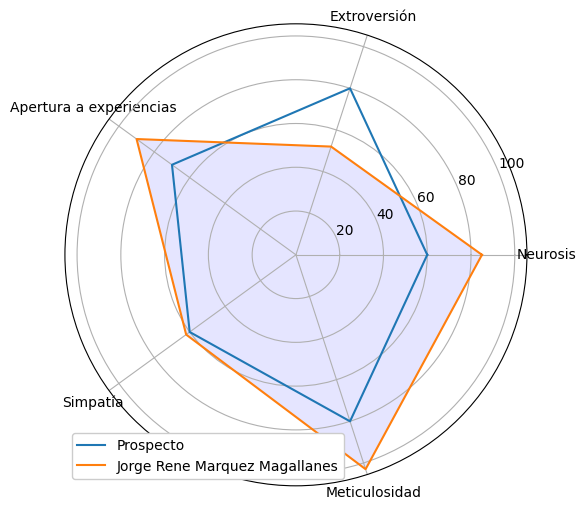

In [7]:
import numpy as np
import seaborn as sns

datos5 = testPersonalidad.loc[:, ["Neurosis", "Extroversión", "Apertura a experiencias", "Simpatía", "Meticulosidad"]]

etiquetas=['Neurosis', 'Extroversión', 'Apertura a experiencias', 'Simpatía', 'Meticulosidad']

lista = list(datos5.iloc[0])
lista=np.concatenate((lista, [lista[0]]))
esperado = (60, 80, 70, 60, 80, 60)


plt.figure(figsize =(10, 6))
plt.subplot(polar = True)

theta = np.linspace(0, 2 * np.pi, len(lista))

lineas, labels = plt.thetagrids(range(0, 360, int(360/len(etiquetas))),
                                                         (etiquetas))
plt.plot(theta, esperado)
plt.plot(theta, lista)
plt.fill(theta, lista, 'b', alpha = 0.1)



plt.legend(labels =("Prospecto", userName.title()), loc = 3, framealpha=1)
plt.savefig(userName.title() + " test personalidad stats 5.png")
plt.show()


(<a list of 12 Line2D ticklines objects>,
 [Text(0.0, 0, 'Label 1'),
  Text(1.2566370614359172, 0, 'Label 2'),
  Text(2.5132741228718345, 0, 'Label 3'),
  Text(3.7699111843077517, 0, 'Label 4'),
  Text(5.026548245743669, 0, 'Label 5'),
  Text(0.0, 0, 'Label 1')])

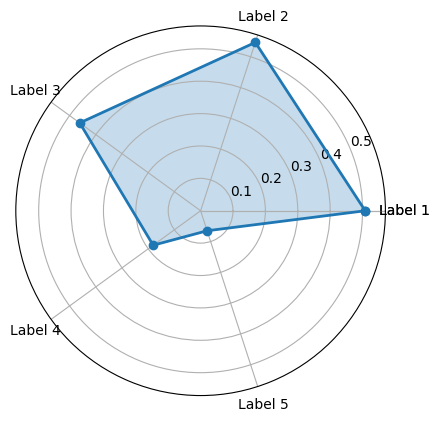

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Creación de un conjunto de datos aleatorio
angles = np.linspace(0, 2 * np.pi, 5, endpoint=False)
values = np.random.random(5)
# Se repite el primer valor para cerrar el gráfico
angles=np.concatenate((angles, [angles[0]]))
values=np.concatenate((values, [values[0]]))
labels=['Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 1']
# Representación del mapa de calor
plt.polar(angles, values, 'o-', linewidth=2)
plt.fill(angles, values, alpha=0.25)
plt.thetagrids(angles * 180 / np.pi, labels)